$\newcommand{\TirName}[1]{\text{#1}}
\newcommand{\inferrule}[3][]{
  \let\and\qquad
  \begin{array}{@{}l@{}}
  \TirName{#1}
  \\
  \displaystyle
  \frac{#2}{#3}
  \end{array}
}
\newcommand{\infer}[3][]{\inferrule[#1]{#2}{#3}}
$

# Meeting 16 - Higher-Order Fun

Bor-Yuh Evan Chang  
Saturday, October 12, 2024

<!-- 3 Expressions -->

<!-- 4 Binding and Scope -->

<!-- 8 Recursion -->

<!-- 9 Inductive Data Types -->

<!-- 11 Concrete Syntax -->

<!-- 12 Abstract Syntax and Parsing -->

<!-- 13 Exercise: Syntax -->

<!-- 14 Static Scoping -->

<!-- 15 Judgments -->

<!-- 16 Variables, Basic Values, and Judgments Lab -->

<!-- 18 Operational Semantics -->

<!-- 19 Functions and Dynamic Scoping -->

<!-- 20 Big-Step Exercise -->

<!-- 21 Evaluation Order  -->

<!-- Static Typing -->

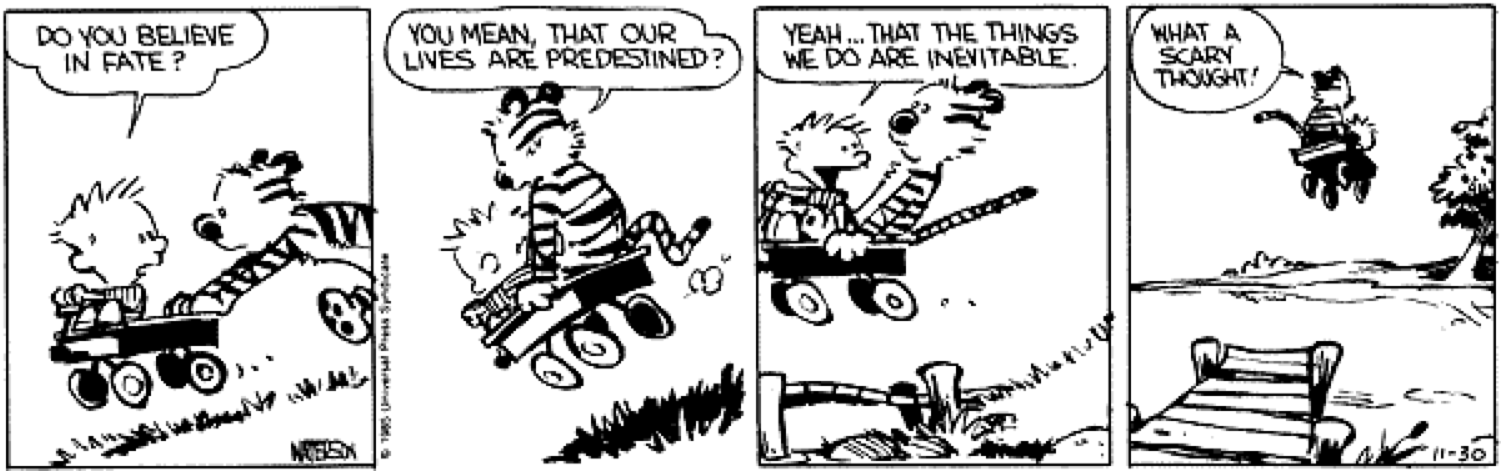

What questions does your neighbor have?

## Links

[ In-Class Slides](in-class/meeting16-higher-order-functions.pdf)<br/> [
In-Class Jupyter](in-class/meeting16-higher-order-functions.ipynb)<br/>
[ Book
Chapter](https://csci3155.cs.colorado.edu/pppl-course/book/higher-order-functions.html)

## Announcements

-   HW4 due Mon 10/21 6pm
-   Exam 1-2 feedback released
    -   See CM Lawrence about errors grading
    -   See me and TAs about how to improve for next time
-   Prof. Chang traveling next week

## Today

-   [Higher-Order
    Functions](https://csci3155.cs.colorado.edu/pppl-course/book/higher-order-functions.html)
    (mini-lecture)
-   Triage Your Questions
    -   HW4?

## Questions?

-   Review:
    -   What is a *higher-order function*?

## Questions?

# Higher-Order Functions

## Currying

In [2]:
0

res0 : Int = 0

``` scala
(n: Int) => n + 1
((n: Int) => n + 1)(41)

val incr: Int => Int = { n => n + 1 }
incr(41)
```

<pre><span class="ansi-cyan-fg">res1_0</span>: <span class="ansi-green-fg">Int</span> =&gt; <span class="ansi-green-fg">Int</span> = ammonite.$sess.cmd1$Helper$$Lambda$1879/0x0000000800a84040@dbf2d1d
<span class="ansi-cyan-fg">res1_1</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">42</span>
<span class="ansi-cyan-fg">incr</span>: <span class="ansi-green-fg">Int</span> =&gt; <span class="ansi-green-fg">Int</span> = ammonite.$sess.cmd1$Helper$$Lambda$1881/0x0000000800a85840@5fe7816d
<span class="ansi-cyan-fg">res1_3</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">42</span></pre>

``` scala
val plus: Int => Int => Int = { x => y => x + y }
plus(3)(4)
```

<pre><span class="ansi-cyan-fg">plus</span>: <span class="ansi-green-fg">Int</span> =&gt; <span class="ansi-green-fg">Int</span> =&gt; <span class="ansi-green-fg">Int</span> = ammonite.$sess.cmd2$Helper$$Lambda$1923/0x0000000800a9f040@566da122
<span class="ansi-cyan-fg">res2_1</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">7</span></pre>

``` scala
def plus(x: Int)(y: Int): Int = x + y
plus(3)(4)
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">plus</span>
<span class="ansi-cyan-fg">res3_1</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">7</span></pre>

``` scala
val incr: Int => Int = plus(1)
incr(41)
```

<pre><span class="ansi-cyan-fg">incr</span>: <span class="ansi-green-fg">Int</span> =&gt; <span class="ansi-green-fg">Int</span> = ammonite.$sess.cmd4$Helper$$Lambda$1940/0x0000000800aad840@615a8fd5
<span class="ansi-cyan-fg">res4_1</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">42</span></pre>

``` scala
def addToFactorial(n: Int): Int => Int = {
  def factorial(n: Int): Int = n match {
    case 0 => 1
    case _ => n * factorial(n - 1)
  }
  val nth = factorial(n)
  m => nth + m
}
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">addToFactorial</span></pre>

``` scala
val tenFactorialPlus = addToFactorial(10)
tenFactorialPlus(47)
tenFactorialPlus(59)
```

<pre><span class="ansi-cyan-fg">tenFactorialPlus</span>: <span class="ansi-green-fg">Int</span> =&gt; <span class="ansi-green-fg">Int</span> = ammonite.$sess.cmd5$Helper$$Lambda$1968/0x0000000800acd040@173d7df4
<span class="ansi-cyan-fg">res6_1</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">3628847</span>
<span class="ansi-cyan-fg">res6_2</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">3628859</span></pre>

# Collections and Callbacks

## Map

In [9]:
0

res7 : Int = 0

``` scala
def increment(l: List[Int]): List[Int] = l match {
  case Nil => Nil
  case h :: t => (h + 1) :: increment(t)
}
increment(List(1, 2, 3))
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">increment</span>
<span class="ansi-cyan-fg">res8_1</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">2</span>, <span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">4</span>)</pre>

``` scala
def double(l: List[Int]): List[Int] = l match {
  case Nil => Nil
  case h :: t => (h * 2) :: double(t)
}
double(List(1, 2, 3))
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">double</span>
<span class="ansi-cyan-fg">res9_1</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">2</span>, <span class="ansi-green-fg">4</span>, <span class="ansi-green-fg">6</span>)</pre>

``` scala
def eachLength(l: List[String]): List[Int] = l match {
  case Nil => Nil
  case h :: t => h.length :: eachLength(t)
}
eachLength(List("Neo", "Trinity", "Morpheus"))
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">eachLength</span>
<span class="ansi-cyan-fg">res10_1</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">7</span>, <span class="ansi-green-fg">8</span>)</pre>

``` scala
def map[A, B](l: List[A])(f: A => B): List[B] = l match {
  case Nil => Nil
  case h :: t => f(h) :: map(t)(f)
}
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">map</span></pre>

``` scala
def increment(l: List[Int]): List[Int] = map(l) { h => h + 1 }
increment(List(1, 2, 3))
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">increment</span>
<span class="ansi-cyan-fg">res12_1</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">2</span>, <span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">4</span>)</pre>

``` scala
def double(l: List[Int]): List[Int] = map(l) { h => h * 2 }
double(List(1, 2, 3))
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">double</span>
<span class="ansi-cyan-fg">res13_1</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">2</span>, <span class="ansi-green-fg">4</span>, <span class="ansi-green-fg">6</span>)</pre>

``` scala
def eachLength(l: List[String]): List[Int] = map(l) { h => h.length }
eachLength(List("Neo", "Trinity", "Morpheus"))
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">eachLength</span>
<span class="ansi-cyan-fg">res14_1</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">7</span>, <span class="ansi-green-fg">8</span>)</pre>

``` scala
List(1, 2, 3).map(i => i * 3)
```

<pre><span class="ansi-cyan-fg">res15</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">6</span>, <span class="ansi-green-fg">9</span>)</pre>

``` scala
List(1, 2, 3) map { i => i * 3 }
List(1, 2, 3) map { _ * 3 }
```

<pre><span class="ansi-cyan-fg">res16_0</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">6</span>, <span class="ansi-green-fg">9</span>)
<span class="ansi-cyan-fg">res16_1</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">6</span>, <span class="ansi-green-fg">9</span>)</pre>

``` scala
List(1, 2, 3) map { i => i * 3 } map { i => i + 1 }
List(1, 2, 3) map { _ * 3 } map { _ + 1 }
```

<pre><span class="ansi-cyan-fg">res17_0</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">4</span>, <span class="ansi-green-fg">7</span>, <span class="ansi-green-fg">10</span>)
<span class="ansi-cyan-fg">res17_1</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">4</span>, <span class="ansi-green-fg">7</span>, <span class="ansi-green-fg">10</span>)</pre>

``` scala
List(1, 2, 3)
  .map(i => i * 3)
  .map(i => i + 1)

List(1, 2, 3)
  .map(_ * 3)
  .map(_ + 1)
```

<pre><span class="ansi-cyan-fg">res18_0</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">4</span>, <span class="ansi-green-fg">7</span>, <span class="ansi-green-fg">10</span>)
<span class="ansi-cyan-fg">res18_1</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">4</span>, <span class="ansi-green-fg">7</span>, <span class="ansi-green-fg">10</span>)</pre>

``` scala
for (i <- List(1, 2, 3)) yield i * 3
List(1, 2, 3) map { i => i * 3 }
```

<pre><span class="ansi-cyan-fg">res19_0</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">6</span>, <span class="ansi-green-fg">9</span>)
<span class="ansi-cyan-fg">res19_1</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">6</span>, <span class="ansi-green-fg">9</span>)</pre>

``` scala
for (i <- List(1, 2, 3) if i % 2 == 1) yield i * 3
```

<pre><span class="ansi-cyan-fg">res20</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">9</span>)</pre>

``` scala
List(1, 2, 3) filter { i => i % 2 == 1 } map { i => i * 3 }
```

<pre><span class="ansi-cyan-fg">res21</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">9</span>)</pre>

``` scala
List(1, 2, 3) filter { i => i % 2 == 1 }
List(1, 2, 3) filter { i => i % 2 == 1 } map { i => i }

List(1, 2, 3) withFilter { i => i % 2 == 1 }
List(1, 2, 3) withFilter { i => i % 2 == 1 } map { i => i}
```

<pre><span class="ansi-cyan-fg">res22_0</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">1</span>, <span class="ansi-green-fg">3</span>)
<span class="ansi-cyan-fg">res22_1</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">1</span>, <span class="ansi-green-fg">3</span>)
<span class="ansi-cyan-fg">res22_2</span>: <span class="ansi-green-fg">collection</span>.<span class="ansi-green-fg">WithFilter</span>[<span class="ansi-green-fg">Int</span>, <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">_</span>]] = scala.collection.IterableOps$WithFilter@55e0d2ab
<span class="ansi-cyan-fg">res22_3</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">1</span>, <span class="ansi-green-fg">3</span>)</pre>

``` scala
for (i <- List(1, 2, 3) if i % 2 == 1) yield i * 3
List(1, 2, 3) withFilter { i => i % 2 == 1 } map { i => i}
```

<pre><span class="ansi-cyan-fg">res23_0</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">9</span>)
<span class="ansi-cyan-fg">res23_1</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">1</span>, <span class="ansi-green-fg">3</span>)</pre>

``` scala
List(None, Some(3), Some(4), None) map { iopt => iopt match {
  case None => 0
  case Some(i) => i + 1
} }
```

<pre><span class="ansi-cyan-fg">res24</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">0</span>, <span class="ansi-green-fg">4</span>, <span class="ansi-green-fg">5</span>, <span class="ansi-green-fg">0</span>)</pre>

``` scala
List(None, Some(3), Some(4), None) map {
  case None => 0
  case Some(i) => i + 1
}
```

<pre><span class="ansi-cyan-fg">res25</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">0</span>, <span class="ansi-green-fg">4</span>, <span class="ansi-green-fg">5</span>, <span class="ansi-green-fg">0</span>)</pre>

## FlatMap

In [28]:
def map[A, B](l: List[A])(f: A => B): List[B] = l match {
  case Nil => Nil
  case h :: t => f(h) :: map(t)(f)
}

defined function map

``` scala
def flatMap[A, B](l: List[A])(f: A => List[B]): List[B] = l match {
  case Nil => Nil
  case h :: t => f(h) ::: flatMap(t)(f)
}
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">flatMap</span></pre>

``` scala
def duplicate[A](l: List[A]) = l flatMap { a => List(a, a) }
duplicate(List(1, 2, 3))
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">duplicate</span>
<span class="ansi-cyan-fg">res28_1</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">1</span>, <span class="ansi-green-fg">1</span>, <span class="ansi-green-fg">2</span>, <span class="ansi-green-fg">2</span>, <span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">3</span>)</pre>

``` scala
val mapped = List(1, 2, 3) map { a => List(a, a) }
val flattened = mapped.flatten
```

<pre><span class="ansi-cyan-fg">mapped</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>]] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">1</span>, <span class="ansi-green-fg">1</span>), <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">2</span>, <span class="ansi-green-fg">2</span>), <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">3</span>))
<span class="ansi-cyan-fg">flattened</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">1</span>, <span class="ansi-green-fg">1</span>, <span class="ansi-green-fg">2</span>, <span class="ansi-green-fg">2</span>, <span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">3</span>)</pre>

<span class="theorem-title">**Exercise 1**</span> Define `map` in terms
of `flatMap`.

``` scala
def map[A, B](l: List[A])(f: A => B): List[B] = ???
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">map</span></pre>

<span class="theorem-title">**Exercise 2**</span> Define `filter` in
terms of `flatMap`.

``` scala
def filter[A](l: List[A])(f: A => Boolean): List[A] = ???
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">filter</span></pre>

## FoldRight

``` scala
def addList(l: List[Int]): Int = l match {
  case Nil => 0
  case h :: t => h + addList(t) 
}
addList(List(1, 2, 3, 4))
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">addList</span>
<span class="ansi-cyan-fg">res32_1</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">10</span></pre>

``` scala
def multList(l: List[Int]): Int = l match {
  case Nil => 1
  case h :: t => h * multList(t)
}
multList(List(1, 2, 3, 4))
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">multList</span>
<span class="ansi-cyan-fg">res33_1</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">24</span></pre>

``` scala
def foldRight[A, B](l: List[A])(z: B)(bop: (A, B) => B): B = l match {
  case Nil => z
  case h :: t => bop(h, foldRight(t)(z)(bop))
}
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">foldRight</span></pre>

``` scala
def addList(l: List[Int]): Int = foldRight(l)(0) { (h, acc) => h + acc }
addList(List(1, 2, 3, 4))

def multList(l: List[Int]): Int = foldRight(l)(1) { (h, acc) => h * acc }
multList(List(1, 2, 3, 4))
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">addList</span>
<span class="ansi-cyan-fg">res35_1</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">10</span>
defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">multList</span>
<span class="ansi-cyan-fg">res35_3</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">24</span></pre>

``` scala
List(1, 2, 3, 4).foldRight(0) { (h, acc) => h + acc }
List(1, 2, 3, 4).foldRight(1) { (h, acc) => h * acc }
```

<pre><span class="ansi-cyan-fg">res36_0</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">10</span>
<span class="ansi-cyan-fg">res36_1</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">24</span></pre>

``` scala
def foldRight[A, B](l: List[A])(z: B)(bop: (A, B) => B): B = l match {
  case Nil => z
  case h :: t => bop(h, foldRight(t)(z)(bop))
}
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">foldRight</span></pre>

<span class="theorem-title">**Exercise 3**</span> Define `map` in terms
of `foldRight`

``` scala
def map[A,B](l: List[A])(f: A => B): List[B] = ???
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">map</span></pre>

<span class="theorem-title">**Exercise 4**</span> Define
`append: (List[A], List[A]) => List[A]` that appends together two lists
into one list (i.e., returns `l1` follows by `l2`) in terms of
`foldRight`:

``` scala
def append[A](l1: List[A], l2: List[A]): List[A] = ???
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">append</span></pre>

## FoldLeft

``` scala
def foldLeft[A, B](l: List[A])(z: B)(bop: (B, A) => B): B = {
  def loop(acc: B, l: List[A]): B = l match {
    case Nil => acc
    case h :: t => loop(bop(acc, h), t)
  }
  loop(z, l)
}
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">foldLeft</span></pre>

``` scala
List(1, 2, 3, 4).foldLeft(1) { (acc, h) => acc * h }
```

<pre><span class="ansi-cyan-fg">res41</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">24</span></pre>

<span class="theorem-title">**Exercise 5**</span> Define `reverse` of a
list in terms of `foldLeft`.

``` scala
def reverse[A](l: List[A]): List[A] = ???
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">reverse</span></pre>

``` scala
List(1, 2, 3, 4).fold(1)(_ * _)
```

<pre><span class="ansi-cyan-fg">res43</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">24</span></pre>

``` scala
List(1, 2, 3, 4).reduce(_ * _)
```

<pre><span class="ansi-cyan-fg">res44</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">24</span></pre>

## Abstract Data Types

In [47]:
val m = Map(2 -> List("two", "dos", "二"), 10 -> List("ten", "diez", "十"))

m : Map [ Int , List [ String ]] = Map (
 2 -> List ( "two" , "dos" , "\u4e8c" ),
 10 -> List ( "ten" , "diez" , "\u5341" )
)

``` scala
m map { case k -> words => k -> words.head }
```

<pre><span class="ansi-cyan-fg">res46</span>: <span class="ansi-green-fg">Map</span>[<span class="ansi-green-fg">Int</span>, <span class="ansi-green-fg">String</span>] = <span class="ansi-yellow-fg">Map</span>(<span class="ansi-green-fg">2</span> -&gt; <span class="ansi-green-fg">"two"</span>, <span class="ansi-green-fg">10</span> -&gt; <span class="ansi-green-fg">"ten"</span>)</pre>

``` scala
m.foldRight(Nil: List[String]) {
  case (_ -> words, acc) => words.head :: acc
}
```

<pre><span class="ansi-cyan-fg">res47</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">String</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">"two"</span>, <span class="ansi-green-fg">"ten"</span>)</pre>

## Parallel and Distributed

> **Scala Parallel Collections Library**
>
> Run the following cell to load the [Scala Parallel
> Collections](https://github.com/scala/scala-parallel-collections)
> library.
>
> ``` scala
> import $ivy.`org.scala-lang.modules::scala-parallel-collections:1.0.4`, scala.collection.parallel.CollectionConverters._
> ```
>
> <pre><span class="ansi-green-fg">import </span><span class="ansi-cyan-fg">$ivy.$                                                         , scala.collection.parallel.CollectionConverters._</span></pre>

In [51]:
val par0to9999 = (0 to 9999).toList.par
val sum = par0to9999.map(_ + 1).reduce(_ + _)
assert(sum == 50005000)

par0to9999 : collection . parallel . immutable . ParSeq [ Int ] = ParVector(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, ...
 sum : Int = 50005000